# KMeans clustering

In [37]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
np.random.seed(333)

In [39]:
random_1 = np.random.randn(2,100)

In [40]:
random_1.shape

(2, 100)

In [41]:
random_2 = np.random.randn(2,100) + 2

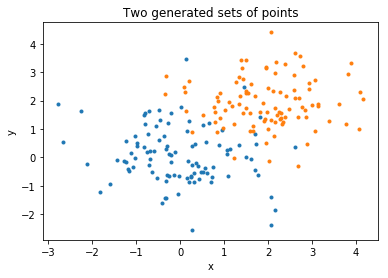

In [55]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.title('Two generated sets of points')
pl.xlabel('x')
pl.ylabel('y');

# 1. Chosing the number of clusters 

nclusters = 2

In [43]:
random_stack = np.hstack([random_1, random_2])

# 2. Setting a guess for the initial centers

In [44]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

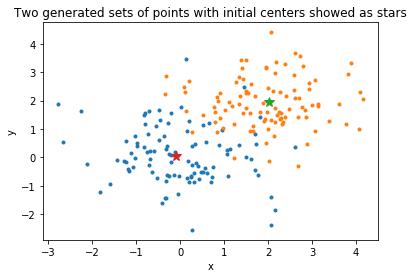

In [56]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.title('Two generated sets of points with initial centers showed as stars')
pl.xlabel('x')
pl.ylabel('y');

In [57]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. Checking for each point which center is closer

In [58]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False, False], dtype=bool)

# 4. Calculating new centers

In [59]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


# 5. Iterating 3&4 steps utill convergence or maximum number of iterations is reached

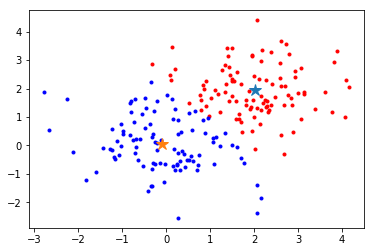

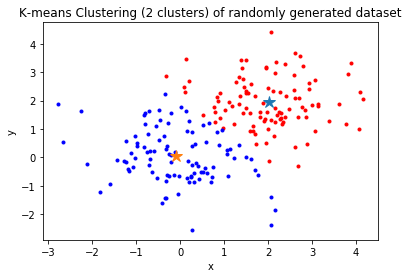

array([ 2.01522567,  1.93589473])

In [60]:
iterations = 0 #iterations counter

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
l3, = ax.plot(centers[0,0], centers[0,1], '*', ms=12)
l4, = ax.plot(centers[1,0], centers[1,1], '*', ms=12)

#pl.show()
display(fig)


ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('K-means Clustering (2 clusters) of randomly generated dataset')

while (not (centers == newc).all()) or iterations > 15:
    print(iterations)
    
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1) #to slow it down
    clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print (centers, newc)
    iterations += 1

plt.show()
newc[0]
